<h1 align="middle"> Formative Assessment Data Preprocessing</h1>

<hr style="border-color: black;">
<h1 align="left"><font color="blue">Data Exploration And Statistical Analysis</font></h1>
<hr style="border-color: black;">

#### Importing all required modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Employee.csv')
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [4]:
df.shape

(148, 6)

<span style = 'background:yellow'>There are 148 rows adnf 6 columns in the dataset.</span>

In [6]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [7]:
df.tail()

,Company,Age,Salary,Place,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [9]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


#### Identify Numerical And Categorical Columns

In [10]:
numerical_columns = df.select_dtypes(include = 'number').columns
print(numerical_columns)

categorical_columns = df.select_dtypes(include = 'object').columns
print(categorical_columns)

Index(['Age', 'Salary', 'Gender'], dtype='object')
Index(['Company', 'Place', 'Country'], dtype='object')


<span style = 'background:yellow'>Out of 6 columns, 3 Categorical and 3 numerical columns But one of numerical column is Label encoding of employe's gender.</span>

#### Checking Value Counts of Categorical Columns

In [11]:
value_counts_company = df['Company'].value_counts()
value_counts_place = df['Place'].value_counts()
value_counts_country = df['Country'].value_counts()

print(f"Company Value Count:{value_counts_company}")
print(f"\nPlace Value Count:{value_counts_place}")
print(f"\nCountry Value Count:{value_counts_country}")

Company Value Count:Company
TCS                          53
Infosys                      45
CTS                          36
Tata Consultancy Services     2
Congnizant                    2
Infosys Pvt Lmt               2
Name: count, dtype: int64

Place Value Count:Place
Mumbai        37
Calcutta      33
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

Country Value Count:Country
India    148
Name: count, dtype: int64


#### Checking Unique, nunique Values

In [12]:
unique_values_company = df['Company'].unique()
nunique_values_company = df['Company'].nunique()

unique_values_place = df['Place'].unique()
nunique_values_place = df['Place'].nunique()

unique_values_country = df['Country'].unique()
nunique_values_country = df['Country'].nunique()

print(f"Company Unique value:{unique_values_company}")
print(f"Company Nunique value:{nunique_values_company}")
print(f"\nPlace Unique value:{unique_values_place}")
print(f"Place Nunique value:{nunique_values_place}")
print(f"\nCountry Unique value:{unique_values_country}")
print(f"Country Nunique value:{nunique_values_country}")

Company Unique value:['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Company Nunique value:6

Place Unique value:['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Place Nunique value:11

Country Unique value:['India']
Country Nunique value:1


<span style = 'background:yellow'>There are 6 companies located in 11 places in India.</span>

### Checking for null values

In [13]:
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

<span style = 'background:yellow'>There are null values found in Company, Age, Salary and Place columns.</span>

### Checking for duplicate values

In [14]:
df.duplicated().sum()

4

<span style = 'background:yellow'>There are 4 duplicate values.</span>

<hr style="border-color: black;">
<h1 align="left"><font color="blue">Data Cleaning</font></h1>
<hr style="border-color: black;">

### Find the missing and inappropriate values, treat them appropriately.

### Removing duplicate values

In [15]:
new_df = df.copy()
unique_df = new_df.drop_duplicates().reset_index(drop = True)
unique_df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
139,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
140,TCS,33.0,9024.0,Calcutta,India,1
141,Infosys,44.0,4034.0,Delhi,India,1
142,TCS,33.0,5034.0,Mumbai,India,1


In [16]:
unique_df.isnull().sum()

Company     8
Age        17
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

<span style = 'background:yellow'>The missing values in the column Company and Place can be replaced with the mode value, the missing values in the column Age and Salary can be replaced with the mean value and the values in the column gender are in appropriate cane be replaced with Male and Female accordingly.</span>

In [17]:
unique_df.describe()

,Age,Salary,Gender
count,127.000000,121.000000,144.000000
mean,30.527559,5283.471074,0.222222
std,11.114717,2585.373600,0.417191
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,33.000000,5000.000000,0.000000
75%,37.500000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


### Checking Outliers in Age and Salary

Text(0.5, 1.0, 'Boxplot - Age')

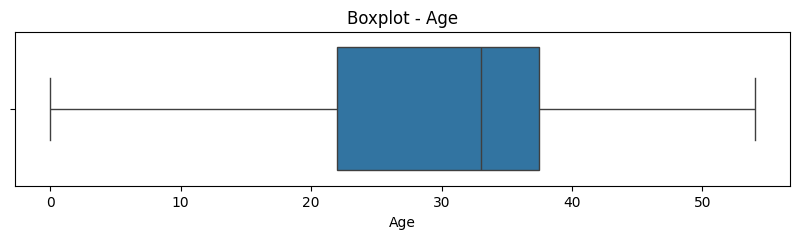

In [19]:
plt.figure(figsize=(10, 2))
sns.boxplot(x = 'Age', data = unique_df)
plt.title('Boxplot - Age')

Text(0.5, 1.0, 'Boxplot - Salary')

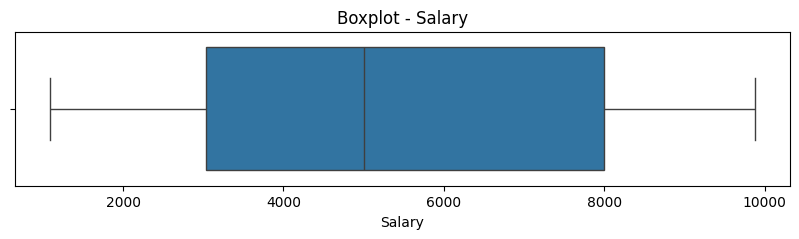

In [20]:
plt.figure(figsize=(10, 2))
sns.boxplot(x = 'Salary', data = unique_df)
plt.title('Boxplot - Salary')

### Using IQR- Method Finding the outliers in the column Age and Salary.

In [21]:
a_q1 = unique_df['Age'].quantile(0.25)
a_q3 = unique_df['Age'].quantile(0.75)
a_iqr = a_q3 - a_q1

print(f'Q1:{a_q1}')
print(f'Q3:{a_q3}')
print(f'IQR:{a_iqr}')

Q1:22.0
Q3:37.5
IQR:15.5


In [22]:
upper_limit_age = a_q3 + (1.5 * a_iqr)
lower_limit_age = a_q3 - (1.5 * a_iqr)
print(f"Upper limit:, {upper_limit_age}")
print(f"Lower limit:, {lower_limit_age}")

Upper limit:, 60.75
Lower limit:, 14.25


In [23]:
# Find outliers in Age
outliers = unique_df.loc[(unique_df['Age'] > upper_limit_age) | (unique_df['Age'] < lower_limit_age)]
print("Outliers:")
outliers

Outliers:


,Company,Age,Salary,Place,Country,Gender
87,Infosys,0.0,3030.0,Calcutta,India,0
91,TCS,0.0,3045.0,Delhi,India,0
100,CTS,0.0,2034.0,Podicherry,India,0
106,TCS,0.0,9024.0,Chennai,India,1
110,Infosys,0.0,3234.0,Mumbai,India,0
120,CTS,0.0,1234.0,Calcutta,India,0


<span style = 'background:yellow'>All the Outliers in age column value 0.</span>

In [24]:
s_q1 = unique_df['Salary'].quantile(0.25)
s_q3 = unique_df['Salary'].quantile(0.75)
s_iqr = s_q3 - s_q1

print(f'Q1:{s_q1}')
print(f'Q3:{s_q3}')
print(f'IQR:{s_iqr}')

Q1:3030.0
Q3:8000.0
IQR:4970.0


In [25]:
upper_limit_salary = s_q3 + (1.5 * s_iqr)
lower_limit_salary = s_q3 - (1.5 * s_iqr)
print(f"Upper limit Salary:, {upper_limit_salary}")
print(f"Lower limit Salary:, {lower_limit_salary}")

Upper limit Salary:, 15455.0
Lower limit Salary:, 545.0


In [26]:
# Find outliers in Salary
outliers = unique_df.loc[(unique_df['Salary'] > upper_limit_salary) | (unique_df['Salary'] < lower_limit_salary)]
print("Outliers:")
outliers

Outliers:


,Company,Age,Salary,Place,Country,Gender


<span style = 'background:yellow'>There are no outliers in the column Salary.</span>

### Replacing inappropriate values in the column gender

In [27]:
unique_df['Gender'] = unique_df['Gender'].replace({0: 'Male', 1: 'Female'})
unique_df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,Male
1,Infosys,30.0,NaN,Mumbai,India,Male
2,TCS,35.0,2300.0,Calcutta,India,Male
3,Infosys,40.0,3000.0,Delhi,India,Male
4,TCS,23.0,4000.0,Mumbai,India,Male
...,...,...,...,...,...,...
139,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,Male
140,TCS,33.0,9024.0,Calcutta,India,Female
141,Infosys,44.0,4034.0,Delhi,India,Female
142,TCS,33.0,5034.0,Mumbai,India,Female


### Replace the value 0 in age as NaN

In [28]:
unique_df['Age'] = unique_df['Age'].astype(float)
unique_df['Age'] = unique_df['Age'].replace({0: np.nan})
unique_df.info()
unique_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  136 non-null    object 
 1   Age      121 non-null    float64
 2   Salary   121 non-null    float64
 3   Place    130 non-null    object 
 4   Country  144 non-null    object 
 5   Gender   144 non-null    object 
dtypes: float64(2), object(4)
memory usage: 6.9+ KB


,Age,Salary
count,121.000000,121.000000
mean,32.041322,5283.471074
std,8.989250,2585.373600
min,17.000000,1089.000000
25%,23.000000,3030.000000
50%,33.000000,5000.000000
75%,40.000000,8000.000000
max,54.000000,9876.000000


### Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

<span style = 'background:yellow'>The missing values in the column Company and Place can be replaced with the mode value, the missing values in the column Age and Salary can be replaced with the mean value and the values in the column gender are in appropriate cane be replaced with Male and Female accordingly.</span>

In [29]:
mean_age = unique_df['Age'].mean()
mean_salary = unique_df['Salary'].mean()
mode_company = unique_df['Company'].mode().iloc[0]
mode_place = unique_df['Place'].mode().iloc[0]

print(f"Mean of Age:{mean_age:.2f}")
print(f"Mean of Salary:{mean_salary:.2f}")
print(f"Mode of Company:{mode_company}")
print(f"Mode of Place:{mode_place}")

Mean of Age:32.04
Mean of Salary:5283.47
Mode of Company:TCS
Mode of Place:Mumbai


In [ ]:
# Replacing the corresponding values

In [30]:
unique_df['Age'] = unique_df['Age'].fillna(mean_age)
unique_df['Salary'] = unique_df['Salary'].fillna(mean_salary)
unique_df['Company'] = unique_df['Company'].fillna(mode_company)
unique_df['Place'] = unique_df['Place'].fillna(mode_place)

unique_df.info()
unique_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  144 non-null    object 
 1   Age      144 non-null    float64
 2   Salary   144 non-null    float64
 3   Place    144 non-null    object 
 4   Country  144 non-null    object 
 5   Gender   144 non-null    object 
dtypes: float64(2), object(4)
memory usage: 6.9+ KB


,Age,Salary
count,144.000000,144.000000
mean,32.041322,5283.471074
std,8.234667,2368.350165
min,17.000000,1089.000000
25%,23.750000,3045.000000
50%,32.041322,5283.471074
75%,36.000000,7084.000000
max,54.000000,9876.000000


<hr style="border-color: black;">
<h1 align="left"><font color="blue">Data Analysis</font></h1>
<hr style="border-color: black;">

### Filter the data with age >40 and salary<5000

In [31]:
filtered_df = unique_df[(unique_df['Age'] > 40) & (unique_df['Salary'] < 5000)]
filtered_df 

,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,Male
32,Infosys,45.0,4034.0,Calcutta,India,Male
39,Infosys,41.0,3000.0,Mumbai,India,Male
50,Infosys,41.0,3000.0,Chennai,India,Male
57,Infosys,51.0,3184.0,Hyderabad,India,Male
68,Infosys,43.0,4034.0,Mumbai,India,Male
75,Infosys,44.0,3000.0,Cochin,India,Male
85,Infosys,41.0,3000.0,Delhi,India,Male
92,Infosys,54.0,3184.0,Mumbai,India,Male
103,Infosys,44.0,4034.0,Delhi,India,Male


### Plot the chart with age and salary

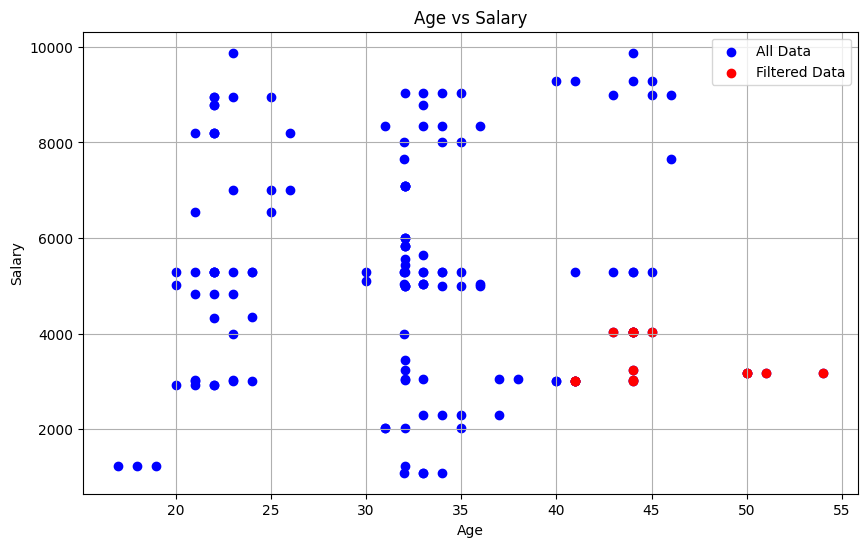

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(unique_df['Age'], unique_df['Salary'], color='blue', label='All Data')
plt.scatter(filtered_df['Age'], filtered_df['Salary'], color='red', label='Filtered Data')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')
plt.legend()
plt.grid(True)
plt.show()

### Count the number of people from each place and represent it visually

In [34]:
place_df = unique_df['Place'].value_counts()
place_df

Place
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

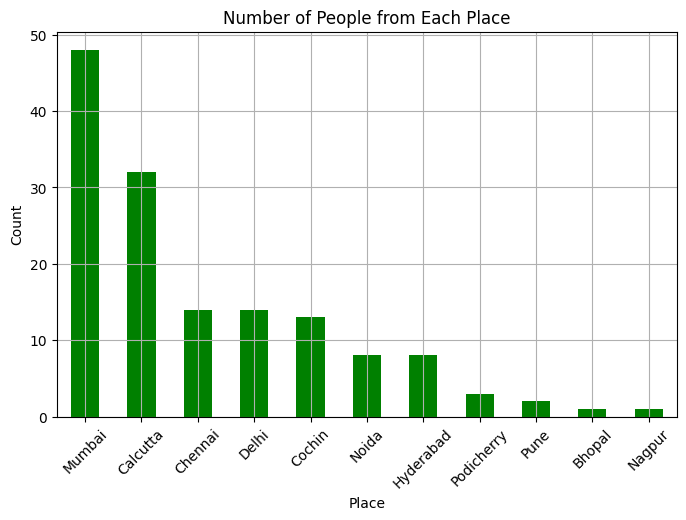

In [35]:
plt.figure(figsize=(8, 5))
place_df.plot(kind='bar', color='green')
plt.xlabel('Place')
plt.ylabel('Count')
plt.title('Number of People from Each Place')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

<hr style="border-color: black;">
<h1 align="left"><font color="blue">Data Encoding:</font></h1>
<hr style="border-color: black;">

### Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

### Using One-hot encoding

In [36]:
import numpy as np
df_one_hot_encoded = pd.get_dummies(data = unique_df, columns = ["Company", "Place", "Country", "Gender"])
print(df_one_hot_encoded )

      Age       Salary  Company_CTS  Company_Congnizant  Company_Infosys  \
0    20.0  5283.471074        False               False            False   
1    30.0  5283.471074        False               False             True   
2    35.0  2300.000000        False               False            False   
3    40.0  3000.000000        False               False             True   
4    23.0  4000.000000        False               False            False   
..    ...          ...          ...                 ...              ...   
139  22.0  8202.000000        False               False            False   
140  33.0  9024.000000        False               False            False   
141  44.0  4034.000000        False               False             True   
142  33.0  5034.000000        False               False            False   
143  22.0  8202.000000        False               False             True   

     Company_Infosys Pvt Lmt  Company_TCS  Company_Tata Consultancy Services  \
0      

<hr style="border-color: black;">
<h1 align="left"><font color="blue">Feature Scaling:</font></h1>
<hr style="border-color: black;">

### After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

### 1. Standardscaler

In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

unique_df = pd.DataFrame(data)

# Select numeric columns only
numeric_cols = ['Age', 'Salary']
numeric_data = unique_df[numeric_cols]

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the numeric data
scaler.fit(numeric_data)

# Transform the numeric data
scaled_data = scaler.transform(numeric_data)
scaled_data

array([[-1.46737581,  0.        ],
       [-0.24875897,  0.        ],
       [ 0.36054944, -1.26412245],
       [ 0.96985786, -0.96752641],
       [-1.10179076, -0.54381778],
       [ 0.        , -0.12010914],
       [ 0.        ,  0.30359949],
       [-1.10179076,  0.72730813],
       [ 0.23868776,  1.15101676],
       [ 1.57916628,  1.57472539],
       [-1.10179076,  0.        ],
       [ 0.23868776, -1.77723361],
       [ 1.57916628,  0.        ],
       [-1.71109918, -1.71579586],
       [ 0.96985786, -0.96752641],
       [-1.10179076, -0.96752641],
       [-1.10179076, -0.95481515],
       [ 0.23868776, -0.12010914],
       [-1.22365245,  0.        ],
       [-0.00503561,  0.        ],
       [ 0.60427281, -0.94845952],
       [ 2.1884747 , -0.88956402],
       [-1.34551413, -0.19468186],
       [ 0.        ,  0.23368757],
       [ 0.        ,  0.76289965],
       [-1.10179076,  1.550574  ],
       [ 0.23868776,  1.29719624],
       [ 1.57916628,  1.69505864],
       [-1.10179076,

### 2.Minmaxscaler

In [48]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

unique_df = pd.DataFrame(data)

# Select numeric columns only for scaling
numeric_cols = ['Age', 'Salary']
numeric_data = unique_df[numeric_cols]

# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the numeric data
scaler.fit(numeric_data)

# Transform the numeric data
scaled_data = scaler.transform(numeric_data)
print(scaled_data)

[[0.08108108 0.47734962]
 [0.35135135 0.47734962]
 [0.48648649 0.13781723]
 [0.62162162 0.21748037]
 [0.16216216 0.33128485]
 [0.40652222 0.44508934]
 [0.40652222 0.55889382]
 [0.16216216 0.6726983 ]
 [0.45945946 0.78650279]
 [0.75675676 0.90030727]
 [0.16216216 0.47734962]
 [0.45945946 0.        ]
 [0.75675676 0.47734962]
 [0.02702703 0.01650165]
 [0.62162162 0.21748037]
 [0.16216216 0.21748037]
 [0.16216216 0.2208945 ]
 [0.45945946 0.44508934]
 [0.13513514 0.47734962]
 [0.40540541 0.47734962]
 [0.54054054 0.22260157]
 [0.89189189 0.23842039]
 [0.10810811 0.42505975]
 [0.40652222 0.54011608]
 [0.40652222 0.68225788]
 [0.16216216 0.89382042]
 [0.45945946 0.82576534]
 [0.75675676 0.93262775]
 [0.16216216 1.        ]
 [0.48648649 0.10754524]
 [0.78378378 0.74712644]
 [0.08108108 0.20996927]
 [0.75675676 0.33515421]
 [0.51351351 0.44895869]
 [0.24324324 0.80949129]
 [0.48648649 0.90303858]
 [0.40540541 0.47734962]
 [0.48648649 0.47734962]
 [0.45945946 0.13781723]
 [0.64864865 0.21748037]


<h2 align="center"><font color="Red">END</font></h2